In [1]:
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

playerSet = []

def year_I():
    resp = requests.get('https://www.basketball-reference.com/teams/LAC/2012.html')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'id':'roster'})
    for row in table.findAll('tr')[1:]:
        playerName = row.findAll('td')[0].text.lower()
        if playerName == 'chauncey billups' or playerName == 'eric bledsoe' or playerName == 'caron butler' or playerName == 'blake griffin' or playerName == 'deandre jordan' or playerName == 'chris paul':
            lastName = playerName.split()[1]
            lastNam = lastName[0:5]
            firstName = playerName.split()[0]
            firstNam = firstName[0:2]
            playerNam = lastNam + firstNam
            playerSet.append(playerNam)
        
    with open("playerNames.pickle", "wb") as f:
        pickle.dump(playerSet, f)
    
    return playerSet

year_I()

c:\python\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


['billuch', 'bledser', 'butleca', 'griffbl', 'jordade', 'paulch']

In [3]:
def get_Stats():
    if not os.path.exists('player_data'):
        os.makedirs('player_data')
    
    with open("playerNames.pickle", "rb") as f:
        playerSet = pickle.load(f)
        
    for player in playerSet:
        if not os.path.exists('player_data/{}.csv'.format(player)):
            d = pd.read_html('https://www.basketball-reference.com/players/{0}/{1}01.html'.format(player[0], player))
            df = d[0]
            df.to_csv('player_data/{}.csv'.format(player))
        else:
            print("He's here!")

get_Stats()

He's here!
He's here!
He's here!
He's here!
He's here!
He's here!


In [4]:
def specify_combine():
    with open("playerNames.pickle", "rb") as f:
        playerSet = pickle.load(f)
    
    player_data = pd.DataFrame()

    all_players = []
    for count, player in enumerate(playerSet):
        df = pd.read_csv('player_data/{}.csv'.format(player), index_col = 0)
        df.set_index("Season", inplace=True)
        
        df = df.filter(['Season', 'Name', 'Age', 'Tm', 'eFG%', 'AST', 'ORB', 'DRB', 'PTS'])
        
        all_players.append(df)
    
    player_data = pd.concat(all_players)
    
    if not os.path.exists('player_data.csv'):
        player_data.to_csv('player_data.csv')
    else:
        player_data.rename(columns={'eFG%':'EFG'}, inplace=True)
        print('Its Already Done')
    return player_data
        
specify_combine()

Its Already Done


,Name,Age,Tm,EFG,AST,ORB,DRB,PTS
Season,,,,,,,,
1997-98,Chauncey Billups,21.0,TOT,0.445,3.9,0.8,1.6,11.2
1997-98,Chauncey Billups,21.0,BOS,0.46,4.3,0.8,1.4,11.1
1997-98,Chauncey Billups,21.0,TOR,0.422,3.3,0.8,1.9,11.3
1998-99,Chauncey Billups,22.0,DEN,0.472,3.8,0.5,1.6,13.9
1999-00,Chauncey Billups,23.0,DEN,0.371,3,0.6,2,8.6
...,...,...,...,...,...,...,...,...
2016-17,Chris Paul,31.0,LAC,0.555,9.2,0.7,4.3,18.1
2017-18,Chris Paul,32.0,HOU,0.55,7.9,0.6,4.8,18.6
2018-19,Chris Paul,33.0,HOU,0.508,8.2,0.6,3.9,15.6


In [5]:
import numpy as np

df = pd.read_csv("player_data.csv", index_col = False)
df['Season'] = df['Season'].apply(lambda x: x[0:4])
indexNames = df[df['Season'] == 'Care'].index
df.drop(indexNames, inplace=True)
df['Season'] = pd.to_datetime(df['Season'])
df.rename(columns={'eFG%':'EFG'}, inplace=True)
df[['Age', 'EFG', 'AST', 'ORB', 'DRB', 'PTS']].astype(float)
df.replace(0, np.nan, inplace=True)
df['EFG'] = df['EFG'].map(lambda x: x*100)
df

,Season,Name,Age,Tm,EFG,AST,ORB,DRB,PTS
0,1997-01-01,Chauncey Billups,21.0,TOT,44.5,3.9,0.8,1.6,11.2
1,1997-01-01,Chauncey Billups,21.0,BOS,46.0,4.3,0.8,1.4,11.1
2,1997-01-01,Chauncey Billups,21.0,TOR,42.2,3.3,0.8,1.9,11.3
3,1998-01-01,Chauncey Billups,22.0,DEN,47.2,3.8,0.5,1.6,13.9
4,1999-01-01,Chauncey Billups,23.0,DEN,37.1,3.0,0.6,2.0,8.6
...,...,...,...,...,...,...,...,...,...
95,2015-01-01,Chris Paul,30.0,LAC,51.7,10.0,0.5,3.7,19.5
96,2016-01-01,Chris Paul,31.0,LAC,55.5,9.2,0.7,4.3,18.1
97,2017-01-01,Chris Paul,32.0,HOU,55.0,7.9,0.6,4.8,18.6
98,2018-01-01,Chris Paul,33.0,HOU,50.8,8.2,0.6,3.9,15.6


In [6]:
new = df.groupby('Name')
player = new.get_group("Blake Griffin").set_index('Season')
player

,Name,Age,Tm,EFG,AST,ORB,DRB,PTS
Season,,,,,,,,
2009-01-01,Blake Griffin,20.0,LAC,NaN,NaN,NaN,NaN,NaN
2010-01-01,Blake Griffin,21.0,LAC,50.8,3.8,3.3,8.8,22.5
2011-01-01,Blake Griffin,22.0,LAC,55.0,3.2,3.3,7.6,20.7
2012-01-01,Blake Griffin,23.0,LAC,54.1,3.7,2.3,6.0,18.0
2013-01-01,Blake Griffin,24.0,LAC,53.3,3.9,2.4,7.1,24.1
2014-01-01,Blake Griffin,25.0,LAC,50.6,5.3,1.9,5.7,21.9
2015-01-01,Blake Griffin,26.0,LAC,50.4,4.9,1.5,6.9,21.4
2016-01-01,Blake Griffin,27.0,LAC,51.3,4.9,1.8,6.3,21.6
2017-01-01,Blake Griffin,28.0,TOT,49.3,5.8,1.3,6.1,21.4


In [7]:
from datetime import date
cp_AST = new.get_group("Chris Paul").set_index('Season')
team = 'LAC'

index1 = player.Tm.ne(team).idxmin()
index2 = cp_AST.Tm.ne(team).idxmin()
index3 = player.where(player.Tm == 'LAC').last_valid_index()
index4 = cp_AST.where(cp_AST.Tm == 'LAC').last_valid_index()

print(index1, index2, index3, index4)

if index1 >= index2:
    trueIndex1 = index1
else:
    trueIndex1 = index2
    
if index3 >= index4:
    trueIndex2 = index4
else:
    trueIndex2 = index3

print(str(trueIndex1) + ' and ' + str(trueIndex2))

2009-01-01 00:00:00 2011-01-01 00:00:00 2017-01-01 00:00:00 2016-01-01 00:00:00
2011-01-01 00:00:00 and 2016-01-01 00:00:00


Correlation Strength: 0.5545986028402841


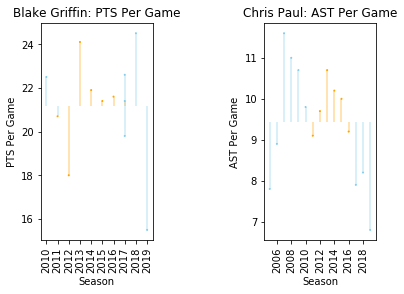

In [13]:
import seaborn as sns

def cpAsst_vs_Stat(pstat, cpstat):
    x = player.index
    y = player[pstat]
    x2 = cp_AST.index
    y2 = cp_AST[cpstat]

    colors = np.where((player.index >= trueIndex1) & (player.index <= trueIndex2), 'orange', 'skyblue')
    colors2 = np.where((cp_AST.index >= trueIndex1) & (cp_AST.index <= trueIndex2), 'orange', 'skyblue')

    plt.subplot(1, 2, 1)
    plt.vlines(x=x, ymin=player[pstat].mean(), ymax=y, color=colors, alpha=0.4)
    plt.scatter(x, y, color=colors, s=1, alpha=1)
    plt.xticks(rotation=90)
    plt.title('{0}: {1} Per Game'.format(player.Name[0], pstat))
    plt.xlabel("Season")
    plt.ylabel('{} Per Game'.format(pstat))

    plt.subplot(1, 2, 2)
    plt.subplots_adjust(wspace=1)
    plt.vlines(x=x2, ymin=cp_AST[cpstat].mean(), ymax=y2, color=colors2, alpha=0.4)
    plt.scatter(x2, y2, color=colors2, s=1, alpha=1)
    plt.xticks(rotation=90)
    plt.title('Chris Paul: {} Per Game'.format(cpstat))
    plt.xlabel("Season")
    plt.ylabel('{} Per Game'.format(cpstat))
    
    cp_ASTT = ((cp_AST.index>=trueIndex1) & (cp_AST.index<=trueIndex2))
    cp_ASTF = cp_AST.loc[cp_ASTT]
    cp_ASTF.rename(columns={'EFG':'cp_EFG', 'AST':'cp_AST', 'ORB':'cp_ORB', 'DRB':'cp_DRB', 'PTS':'cp_PTS'}, inplace=True)
    cp_ASTF = cp_ASTF.filter(['cp_EFG', 'cp_AST', 'cp_ORB', 'cp_DRB', 'cp_PTS'])
    cp_ASTF.reset_index(drop=True, inplace=True)
    
    playerT = ((player.index>=trueIndex1) & (player.index<=trueIndex2))
    playerF = player.loc[playerT]
    playerF.rename(columns={'EFG':'tmate_EFG', 'AST':'tmate_AST', 'ORB':'tmate_ORB', 'DRB':'tmate_DRB', 'PTS':'tmate_PTS'}, inplace=True)
    playerF = playerF.filter(['tmate_EFG', 'tmate_AST', 'tmate_ORB', 'tmate_DRB', 'tmate_PTS'])
    playerF.reset_index(drop=True, inplace=True)
    
    result = pd.concat([cp_ASTF, playerF], axis=1).corr()
    result = result[['tmate_{}'.format(pstat)]].loc[['cp_{}'.format(cpstat)]]
    print('Correlation Strength: ' + str(result.values[0][0]))
    

cpAsst_vs_Stat('PTS', 'AST')

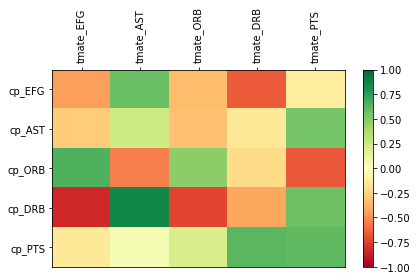

In [607]:
def corr_setup():

    cp_ASTT = ((cp_AST.index>=trueIndex1) & (cp_AST.index<=trueIndex2))
    cp_ASTF = cp_AST.loc[cp_ASTT]
    cp_ASTF.rename(columns={'EFG':'cp_EFG', 'AST':'cp_AST', 'ORB':'cp_ORB', 'DRB':'cp_DRB', 'PTS':'cp_PTS'}, inplace=True)
    cp_ASTF = cp_ASTF.filter(['cp_EFG', 'cp_AST', 'cp_ORB', 'cp_DRB', 'cp_PTS'])
    cp_ASTF.reset_index(drop=True, inplace=True)
    
    playerT = ((player.index>=trueIndex1) & (player.index<=trueIndex2))
    playerF = player.loc[playerT]
    playerF.rename(columns={'EFG':'tmate_EFG', 'AST':'tmate_AST', 'ORB':'tmate_ORB', 'DRB':'tmate_DRB', 'PTS':'tmate_PTS'}, inplace=True)
    playerF = playerF.filter(['tmate_EFG', 'tmate_AST', 'tmate_ORB', 'tmate_DRB', 'tmate_PTS'])
    playerF.reset_index(drop=True, inplace=True)
    
    
    result = pd.concat([cp_ASTF, playerF], axis=1).corr()
    result = result[['tmate_EFG', 'tmate_AST', 'tmate_ORB', 'tmate_DRB', 'tmate_PTS']].loc[['cp_EFG', 'cp_AST', 'cp_ORB', 'cp_DRB', 'cp_PTS']]
    
    
    data = result.values
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = result.columns
    row_labels = result.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    
corr_setup()